In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets


In [2]:
# Download MNIST dataset
def load_mnist_data(train_batch_size, test_batch_size):
    # Common transformation: Resize images and convert to tensor
    mnist_transform = transforms.Compose([
        transforms.Resize((32, 32)),  # Resizing to 32x32
        transforms.ToTensor()         # Convert to tensor
    ])

    # Load the training dataset
    mnist_train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=True, download=True, transform=mnist_transform),
        batch_size=train_batch_size, shuffle=True
    )

    # Load the testing dataset
    mnist_test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=False, transform=mnist_transform),
        batch_size=test_batch_size, shuffle=True
    )

    return mnist_train_loader, mnist_test_loader



In [3]:

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolutional layers
        self.conv_layer1 = nn.Conv2d(1, 6, 5)  # Input: 1 channel, Output: 6 channels, Kernel: 5x5
        self.conv_layer2 = nn.Conv2d(6, 16, 5) # Input: 6 channels, Output: 16 channels, Kernel: 5x5

        # Fully connected layers
        self.fc_layer1 = nn.Linear(16 * 5 * 5, 120)  # Input from flattened conv layers
        self.fc_layer2 = nn.Linear(120, 84)
        self.fc_layer3 = nn.Linear(84, 10)  # Output layer for 10 classes

    def forward(self, x):
        # Apply conv -> relu -> maxpool
        x = F.max_pool2d(F.relu(self.conv_layer1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv_layer2(x)), 2)

        # Flatten the tensor before fully connected layers
        x = x.view(x.size(0), -1)  # Flatten the input tensor

        # Apply fully connected layers with ReLU activations
        x = F.relu(self.fc_layer1(x))
        x = F.relu(self.fc_layer2(x))

        # Final output layer (no activation, as CrossEntropyLoss includes softmax)
        x = self.fc_layer3(x)

        return x


In [4]:
def train_cnn_model(cnn_model, criterion, current_epoch, train_loader, optimizer):
    total_loss = 0
    total_samples = 0
    correct_predictions = 0
    cumulative_loss = 0
    batch_count = 0

    cnn_model.train()
    for batch_index, (inputs, labels) in enumerate(train_loader):
        batch_count += 1
        optimizer.zero_grad()
        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted_labels = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted_labels == labels).sum().item()
        cumulative_loss += loss.item()

        # Print progress after every 150 batches or at the end
        if (batch_index + 1) % 150 == 0 or (batch_index + 1) == len(train_loader):
            accuracy = 100.0 * correct_predictions / total_samples
            print(f'Epoch: {current_epoch}, Batch: {batch_index + 1}/{len(train_loader)}, '
                  f'Accuracy: {round(accuracy, 2)}%, Loss: {loss.item():.6f}')

    # Calculate the average loss and final accuracy
    total_loss = cumulative_loss / batch_count
    final_accuracy = 100.0 * correct_predictions / total_samples

    return total_loss, round(final_accuracy, 2)


In [5]:
# Load the MNIST data
train_loader, test_loader = load_mnist_data(64, 1000)

# Initialize the CNN model
cnn_model = CNNModel()

# Define the optimizer and loss function
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# Lists to store loss and accuracy over epochs
loss_arr = []
accuracy_arr = []

# Train the model for 9 epochs
for epoch in range(1,10):
    # Train the CNN model for one epoch
    avg_loss, accuracy = train_cnn_model(cnn_model, criterion, epoch, train_loader, optimizer)

    # Store the loss and accuracy
    loss_arr.append(avg_loss)
    accuracy_arr.append(accuracy)

    print(f'Epoch {epoch}: Average Loss: {avg_loss:.6f}, Accuracy: {accuracy}%')


Epoch: 1, Batch: 150/938, Accuracy: 35.42%, Loss: 0.825189
Epoch: 1, Batch: 300/938, Accuracy: 60.99%, Loss: 0.191518
Epoch: 1, Batch: 450/938, Accuracy: 71.95%, Loss: 0.279183
Epoch: 1, Batch: 600/938, Accuracy: 77.79%, Loss: 0.043514
Epoch: 1, Batch: 750/938, Accuracy: 81.37%, Loss: 0.097053
Epoch: 1, Batch: 900/938, Accuracy: 83.93%, Loss: 0.037955
Epoch: 1, Batch: 938/938, Accuracy: 84.44%, Loss: 0.104387
Epoch 1: Average Loss: 0.482096, Accuracy: 84.44%
Epoch: 2, Batch: 150/938, Accuracy: 97.16%, Loss: 0.086717
Epoch: 2, Batch: 300/938, Accuracy: 97.23%, Loss: 0.052586
Epoch: 2, Batch: 450/938, Accuracy: 97.33%, Loss: 0.171509
Epoch: 2, Batch: 600/938, Accuracy: 97.47%, Loss: 0.018995
Epoch: 2, Batch: 750/938, Accuracy: 97.49%, Loss: 0.160942
Epoch: 2, Batch: 900/938, Accuracy: 97.54%, Loss: 0.006159
Epoch: 2, Batch: 938/938, Accuracy: 97.55%, Loss: 0.167381
Epoch 2: Average Loss: 0.078593, Accuracy: 97.55%
Epoch: 3, Batch: 150/938, Accuracy: 98.11%, Loss: 0.196135
Epoch: 3, Batch

In [6]:
class CNNModel_2(nn.Module):
    def __init__(self):
        super(CNNModel_2, self).__init__()
        
        # Convolutional layers
        self.conv_layer1 = nn.Conv2d(1, 32, 5)  # Input: 1 channel, Output: 32 channels, Kernel: 5x5
        self.conv_layer2 = nn.Conv2d(32, 64, 5) # Input: 32 channels, Output: 64 channels, Kernel: 5x5
        self.conv_layer3 = nn.Conv2d(64, 64, 5) # Input: 64 channels, Output: 64 channels, Kernel: 5x5
        
        # Fully connected layers
        self.fc_layer1 = nn.Linear(1024, 256)   # Flattened input from conv layers
        self.fc_layer2 = nn.Linear(256, 10)     # Output layer (for 10 classes)

    def forward(self, x):
        # Apply conv -> relu
        x = F.relu(self.conv_layer1(x))
        
        # Conv -> relu -> maxpool -> dropout
        x = F.relu(F.max_pool2d(self.conv_layer2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)

        # Conv -> relu -> maxpool -> dropout
        x = F.relu(F.max_pool2d(self.conv_layer3(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)

        # Flatten the tensor for fully connected layers
        x = x.view(x.size(0), -1)  # Flatten

        # Fully connected layers
        x = F.relu(self.fc_layer1(x))
        x = F.dropout(x, training=self.training)

        # Output layer with log softmax for classification
        x = self.fc_layer2(x)
        return F.log_softmax(x, dim=1)



In [7]:
# Load the MNIST data
train_loader, test_loader = load_mnist_data(64, 1000)

# Initialize the CNN model (CNNModel_2)
cnn_model_2 = CNNModel_2()

# Initialize the optimizer and loss function
optimizer_2 = torch.optim.SGD(cnn_model_2.parameters(), lr=0.01, momentum=0.9)
criterion_2 = nn.CrossEntropyLoss()

# Lists to store loss and accuracy for CNNModel_2
loss_arr_2 = []
accuracy_arr_2 = []

# Train the model for 10 epochs
for epoch in range(1, 11):
    print('New epoch')
    avg_loss, accuracy = train_cnn_model(cnn_model_2, criterion_2, epoch, train_loader, optimizer_2)
    
    # Store the loss and accuracy for each epoch
    loss_arr_2.append(avg_loss)
    accuracy_arr_2.append(accuracy)

    print(f'Epoch {epoch}: Avg Loss: {avg_loss:.6f}, Accuracy: {accuracy}%')


New epoch
Epoch: 1, Batch: 150/938, Accuracy: 39.07%, Loss: 0.403734
Epoch: 1, Batch: 300/938, Accuracy: 62.6%, Loss: 0.272967
Epoch: 1, Batch: 450/938, Accuracy: 72.39%, Loss: 0.213725
Epoch: 1, Batch: 600/938, Accuracy: 77.66%, Loss: 0.151070
Epoch: 1, Batch: 750/938, Accuracy: 81.06%, Loss: 0.209991
Epoch: 1, Batch: 900/938, Accuracy: 83.37%, Loss: 0.101086
Epoch: 1, Batch: 938/938, Accuracy: 83.83%, Loss: 0.156540
Epoch 1: Avg Loss: 0.478655, Accuracy: 83.83%
New epoch
Epoch: 2, Batch: 150/938, Accuracy: 95.94%, Loss: 0.172128
Epoch: 2, Batch: 300/938, Accuracy: 96.05%, Loss: 0.065739
Epoch: 2, Batch: 450/938, Accuracy: 96.07%, Loss: 0.092586
Epoch: 2, Batch: 600/938, Accuracy: 96.12%, Loss: 0.264859
Epoch: 2, Batch: 750/938, Accuracy: 96.2%, Loss: 0.122458
Epoch: 2, Batch: 900/938, Accuracy: 96.36%, Loss: 0.097877
Epoch: 2, Batch: 938/938, Accuracy: 96.38%, Loss: 0.036944
Epoch 2: Avg Loss: 0.114739, Accuracy: 96.38%
New epoch
Epoch: 3, Batch: 150/938, Accuracy: 97.01%, Loss: 0.07

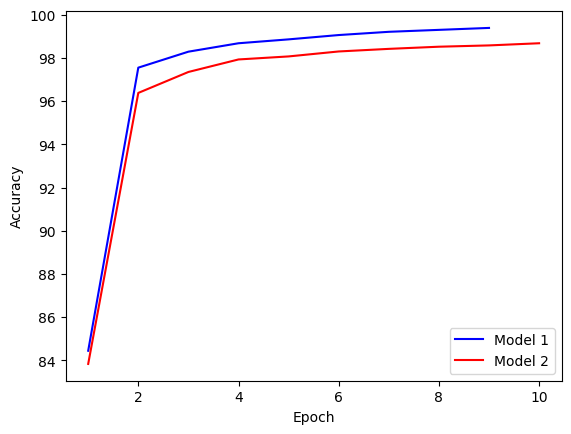

In [8]:
import matplotlib.pyplot as plt

# Plot accuracy for both models
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Model 1 has data for 9 epochs
plt.plot(np.arange(1, 10), accuracy_arr, color="blue")

# Model 2 has data for 10 epochs
plt.plot(np.arange(1, 11), accuracy_arr_2, color="red")

# Add legend
plt.legend(['Model 1', 'Model 2'])

# Display plot
plt.show()


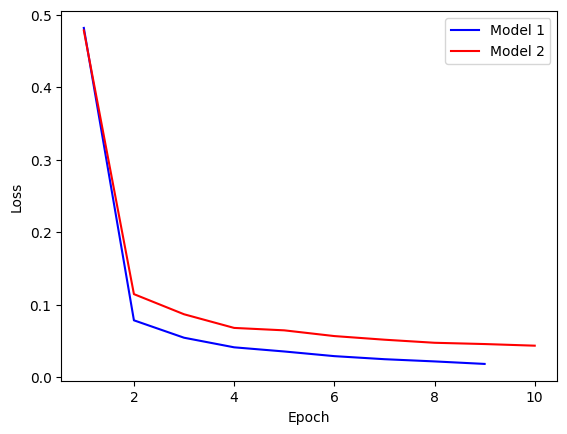

In [9]:
# Plot loss for both models
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Model 1 has data for 9 epochs
plt.plot(np.arange(1, 10), loss_arr, color="blue")

# Model 2 has data for 10 epochs
plt.plot(np.arange(1, 11), loss_arr_2, color="red")

# Add legend to differentiate between models
plt.legend(['Model 1', 'Model 2'])

# Display plot
plt.show()
